<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Authors: Matt Brems (DC), Marc Harper (LA)_

### Learning Objectives 
- Describe modeling.
- Calculate mean squared error.
- State the assumptions of a linear regression model.
- Be able to interpret the coefficients of a linear regression model.
- Identify the difference between simple and multiple linear regression.
- Fit, generate predictions from, and evaluate a linear regression model in `sklearn`.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Naive/Baseline Prediction

<details><summary>I have my data in hand. If I want to generate the same predicted $y$ value for all of my observations, what is the best $y$ value for me to predict?</summary>
    
- I will probably use the mean of my $y$ values, $\bar{y}$.
</details>

### Let's generate some data.

In [16]:
# Let's make sure we get the same results.
np.random.seed(42)

# Generate 100 values of inputs equally spaced between -5 and 50.
inputs = np.linspace(-5, 50, 100)

# Generate outputs to be 50 + 2 times X + some random noise around that.
outputs = 50 + 2 * inputs + np.random.normal(0, 20, size=len(inputs))

In [17]:
# Save our variables in a DataFrame.
df = pd.DataFrame({'X': inputs, 'Y': outputs})

# Check the first five rows to make sure we did it properly.
df.head()

,X,Y
0,-5.000000,49.934283
1,-4.444444,38.345825
2,-3.888889,55.175993
3,-3.333333,73.793930
4,-2.777778,39.761377


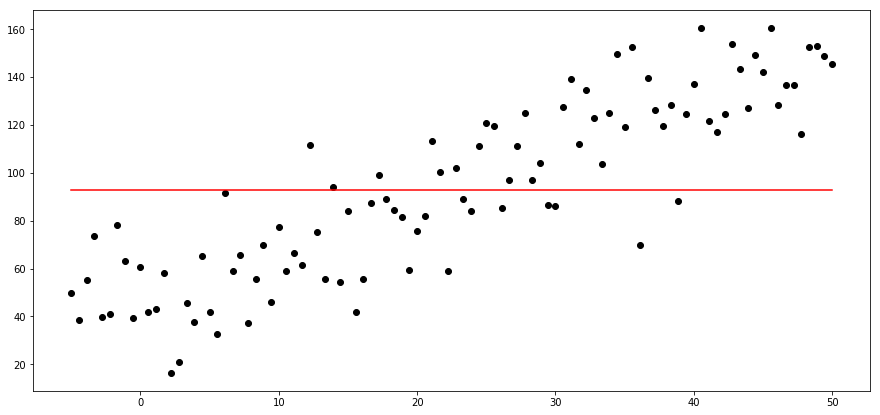

In [18]:
# Create a figure.
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
plt.scatter(df['X'],
            df['Y'],
            color='black')

# Also generate a line for our prediction.
plt.plot((-5, 50),
         (np.mean(df['Y']), np.mean(df['Y'])),
         color='red');

In [19]:
# Create column called Mean_Yhat that is the mean of Y.
df['ybar'] = np.mean(df['y'])

KeyError: 'y'

In [ ]:
# Check first five rows to make sure we did it properly.
df.head()

<details><summary>Is this a good model?</summary>

- Probably not... but what does "good" mean? It depends on how we describe good.
</details>

## Finding the "best" slope and intercept

<img src="./images/residuals_mean.png" alt="drawing" width="400"/>

<img src="./images/residuals_line.png" alt="drawing" width="400"/>

<details><summary>Which model is better: the one in image 1 or the one in image 2? Why?</summary>

- The model in image 1 is probably better.
- Our gaps between the model and the data look smaller in image 1. (There's less blue in image 1 than in image 2!)
</details>

**1. If we want to find the "best" slope and intercept, we will need to define what it means to be the "best."**

**2. We need to be able to numerically optimize (maximize or minimize) this criterion.**


### Residuals/Errors

The difference between the true value of $y$ and the predicted value of $y$ (denoted $\hat{y}$, "y-hat") is known as a "residual" or an "error". We use these terms interchangeably! It's usually denoted:

For every value of $i$ from 1 to $n$, we:
- have an observed $X_i$.
- have an observed $Y_i$.
- can calculate a predicted value $\hat{Y}_i$ (predicted from our model).
- can calculate a residual $\varepsilon_i = Y_i - \hat{Y}_i$.

##### Made up example of $X_i$, $Y_i$, $\hat{Y}_i$, and $\varepsilon_i$:

| $x_i$ | $y_i$   | $\hat{y}_i$ | $e_i$ |
|---|-----|-------|----------|
| 1 | 49  | 50    | -1       |
| 2 | 102 | 100   | +2       |
| 3 | 151 | 150   | +1       |
| 4 | 198 | 200   | -2       |

### Mean Squared Error (MSE)

A common way to define the "best fit line" is to try to get our residuals (a.k.a. errors) to be as close to zero as possible by minimizing the **mean squared error (MSE)**.

- Mean squared error is **literally** the average of all of our errors squared.

### $$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

The mean squared error is one example of a **[loss function](https://blog.algorithmia.com/introduction-to-loss-functions/)**, which is just some way to measure how good or bad a model is.
- We will see many different loss functions throughout DSI!

Remember our naive prediction? Let's see how it does.

In [21]:
# Define a function called MSE that will take in two arguments:
# a column of true values and a column of predicted values,
# then return the Mean Squared Error of those data.

def MSE(y_true, y_hat):
    diff = y_true - y_hat
    squared_diff = diff**2
    return np.mean(squared_diff)

In [22]:
# Calculate MSE of our naive prediction.
def mse(observed_values, predicted_values):
    diff = observed_values - predicted_values
    squared_diff = diff ** 2 
    return np.mean(squared_diff)
  

In [23]:
mse(df['Y'], df['Mean_Yhat'])

KeyError: 'Mean_Yhat'

### Minimizing the MSE

For simple linear regression [we can derive the intercept and slope that minimize the MSE algebraically](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line).

- Note: You might see SSE (sum of squared errors) and RSS (residual sum of squares) in different places. While MSE is a different number from SSE and RSS, minimizing one will minimize all three! It is mathematically equivalent to minimize any of these three, so you will get the same exact line of best fit whether you minimize MSE or SSE or RSS.

Given variables:
- $\bar{y}$ : the sample mean of observed values $y$
- $\bar{x}$ : the sample mean of observed values $x$
- $s_Y$ : the sample standard deviation of observed values $y$
- $s_X$ : the sample standard deviation of observed values $x$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $x$ and $y$

The equations for the intercept and slope that minimize the MSE are:

### $$
\begin{eqnarray*}
\textbf{y-intercept: }\hat{\beta}_0 &=& \bar{y} - \hat{\beta}_1 \bar{x} \\
\textbf{slope: }\hat{\beta}_1 &=& r_{XY} \frac{s_Y}{s_X}
\end{eqnarray*}
$$

### Calculate beta coefficients by hand.

In [9]:
# Define function.
def line_of_best_fit(x, y):

    # Calculate the five "ingredients."
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    std_y = np.std(y, ddof = 1)
    std_x = np.std(x, ddof = 1)
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1 * x_bar

    # Return line of best fit.
    return beta_0 + beta_1 * df['X']

In [10]:
# Create column called Linear_Yhat that is our line of best fit.
df['Linear_Yhat'] = line_of_best_fit(df['X'], df['Y'])

#### We can now plot our line.

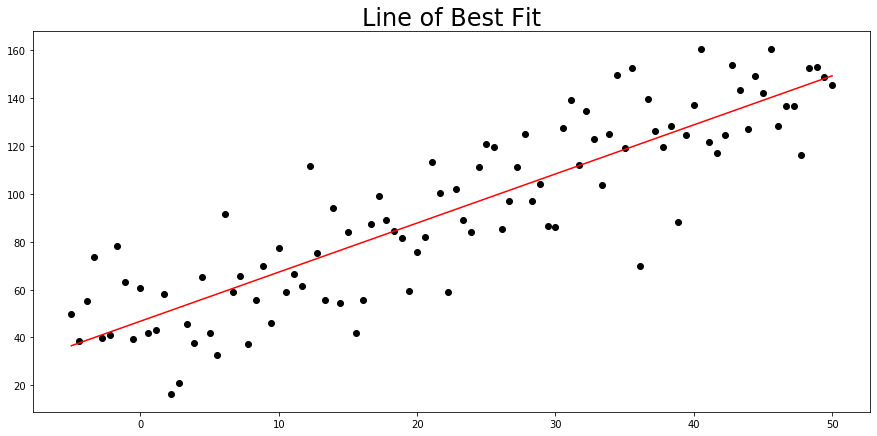

In [11]:
# Create a figure.
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
plt.scatter(df['X'], df['Y'], color = 'black')

# Also generate a line for our prediction.
plt.plot(df['X'],
         df['Linear_Yhat'],
         color = 'red')

# Create a title.
plt.title('Line of Best Fit', fontsize = 24);

#### We can also plot our residuals.

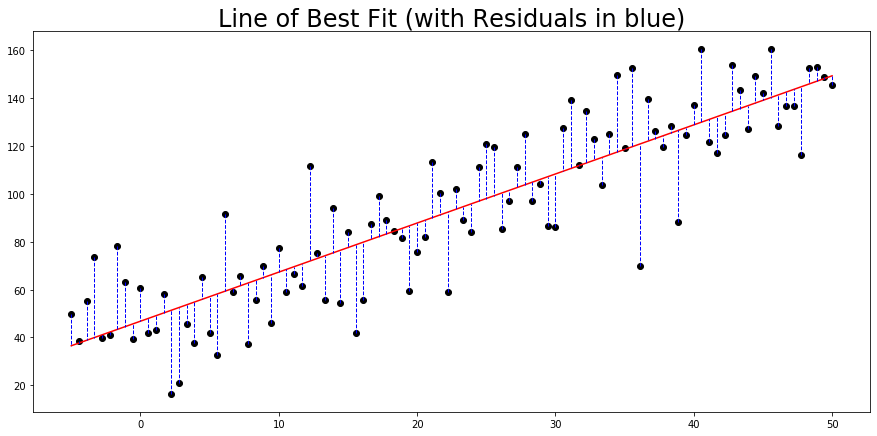

In [12]:
# Create a figure.
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
plt.scatter(df['X'],
            df['Y'],
            color='black')

# Also generate a line for our prediction.
plt.plot(df['X'],
         df['Linear_Yhat'],
         color='red')

# Iterate over our DataFrame, plotting a dashed line 
# from each observed value to its predicted value.
# Code originally written by Marc Harper.
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']),
             (row['Y'], row['Linear_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)
    
# Create a title.
plt.title('Line of Best Fit (with Residuals in blue)', fontsize = 24);

Let's calculate our mean squared error.

In [13]:
MSE(df['y'], df['yhat_linear'])

325.96188539923133

<details><summary>Why would we prefer this "line of best fit" to our "naive baseline prediction" of the mean of our Y?</summary>

- Our new MSE is much smaller.
- This means that on average our residuals are smaller and we have a better fit.
</details>

This helps us understand what a residual is and what makes a "good" model versus a "bad" model. However, this isn't how we will actually build a model.

### A preface on modeling

As we venture down the path of modeling, it can be difficult to determine which choices are "correct" or "incorrect."
- Model building is part art and part science.
- There's rarely one "correct" option.
- "Correct" is usually determined by what problem you're trying to solve!

It's essential to practice modeling on a variety of data. This will help you understand how different models perform on different types of data under different circumstances!

Exploring datasets on your own with the skills and tools you learn in class is highly recommended! _(Exploring of interesting datasets and building models make for really good blog posts...)_

##  `sklearn` & `statsmodels`

---

This week, we'll introduce the modeling packages `sklearn` (also called `scikit-learn`) and `statsmodels` in the context of regression modeling. These are both powerful Python packages with different strengths. 

In general:
- **`sklearn`** is the *machine learning* package
- **`statsmodels`** is the *statistics* package

Though the terms have immense overlap:
- machine learning tends to be more prediction focused, while 
- statistics is more inference focused.

**Remember: even with all the power provided by these modeling tools, it's *never* a replacement for good EDA!**

### Documentation

Get familiar with looking up things in the `sklearn` and `statsmodels` documentation. You are going to be doing a lot of it over the course of DSI and beyond.

- [The sklearn documentation can be found here.](http://scikit-learn.org/stable/documentation.html)
- [The statsmodels documentation can be found here.](http://statsmodels.sourceforge.net/devel/)

The packages have fairly different approaches and syntax for constructing models. Below are examples for linear regression in each package:
- [Linear regression in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Linear regression in statsmodels](http://www.statsmodels.org/devel/examples/notebooks/generated/ols.html)


--- 
<details><summary>(BONUS) Want to know more about sklearn's background?</summary>

<img src="https://avatars1.githubusercontent.com/u/25111?v=3&s=200" style="float: left; margin: 0 25px;"> Scikit-learn was founded in 2007 as a Google summer of code project by [David Cournapeau](https://github.com/cournape).  Later in 2007, Matthieu Brucher published his thesis on Scikit-learn.  Since then, the Scikit-learn project has taken on a worldwide team of owners. A great high level overview of the project can be found in a 2011 publication in [Journal of Machine Learning Research 12 (2011) 2825-2830](http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf).

Skikit-learn is part of the Scipy family of "kits".  Explore some of the [other projects](https://scikits.appspot.com/scikits) in this family.
<br clear="all"><br>

**Scikit-learn provides a wide variety of machine learning models, including:**

- Linear regression
- Logistic regression
- Support Vector Machines
- Classification And Regression Tree Models
- Naive Bayes
- Clustering Models (K-Means, Hierarchical, DBScan)

**It also handles the construction of typical machine learning pipeline utilities for:**
- Model evaluation
- Model selection
- Preprocessing
- Natural Language Processing
- Dimensionality Reduction

**Scikit-learn comes with a ton of datasets that are cleaned and formatted to work with the models provided by their library:**
- Iris Flowers
- Diabetes Diagnostics
- Various sample images (for classification)
  - Faces
  - MNIST (handwriting examples)
- Random data generators
- Spam examples
- Newsgroup classfication (lots of NSFW examples in here)

[Read more about Scikit-learn datasets](http://scikit-learn.org/stable/datasets/)

### `sklearn` under the hood

- **Numpy**:  The base for data structures and transformations. Input data is represented as numpy arrays, integrating seamlessly with other scientific Python libraries. Numpy’s viewbased memory model limits copies, even when binding with compiled code.  It also provides basic arithmetic and linear algebra operations.<br><br>

- **Scipy**:  Efficient algorithms for linear algebra, sparse matrix representation, special functions and basic statistical functions.<br><br>

- **Cython**:  A language for combining C with Python. Cython makes it easy to reach the performance of compiled languages with Python-like syntax and high-level operations.

</details>

## Load the diamonds data

We will be constructing a simple linear regression model, then extend this to multiple linear regression. Included in the datasets folder is a dataset on diamond prices.

In [14]:
# Read in Diamonds data.
diamonds = pd.read_csv('../data/diamonds.csv')

# Check out first five rows.
diamonds.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


The columns are:

    carat: the carat weight of diamonds
    cut, color, clarity: (ignore for now, since they're categorical)
    depth, table: diamond measurements
    price: the price of the diamond

We will use `carat` to predict `price`.

In [15]:
# Import LinearRegression from SKLearn.linear_model.
from sklearn.linear_model import LinearRegression

In [16]:
# Set up our X and y variables.

y = diamonds['price'] # y = what we want to predict
X = diamonds[['carat']] # X = what we use to predict y

# y is usually lower-case because it's only one column.
# X is usually upper-case because it's usually multiple columns.

In [17]:
print(X.shape)

(53940, 1)


`X` is a matrix / dataframe with:
- **1** predictor
- **53940** rows/observations.

In [18]:
print(y.shape)

(53940,)


`y` is a vector with:
- **1** column (corresponding to `price`).
- **53940** rows/observations.

> _`X` and `y` datasets must always match **in number of observations**! If they don't, you'll get an error._

In [19]:
X.head()

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31


**Building a Model in Four Steps**:
1. Instantiate model.
2. Fit model to the data.
3. Generate predictions.
4. Evaluate model.

Let's build a linear regression model using `sklearn`. [The documentation is linked here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [20]:
# First, we instantiate our model.
model = LinearRegression()

### What does it mean to "instantiate" a model?

We have created a class object that exists. But that's it! We haven't given it any data. 
- In this case, `model` is an object of class `LinearRegression`. [If you want, check out the source code here.](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/linear_model/base.py#L367)

In [21]:
# Next, we fit our model to our data.
model.fit(X, y)

/Users/mattbrems/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### What does it mean to "fit" a model?

We write a simple linear regression model as follows:

### $$ Y = \beta_0 + \beta_1 X_1 + \varepsilon$$

Right now, **our model is not yet fit**. The values of $\beta_0$ and $\beta_1$ could be anything.

When we "fit" a model, we are estimating the parameters of the model with our data. The process of fitting our model means to calculate the values of $\hat{\beta}_0$ and $\hat{\beta}_1$, our best guesses for what the true values of what $\beta_0$ and $\beta_1$ are.

<details><summary>Our goal is to find the best values for each beta. But... how do we define the "best" values?</summary>
    
- We pick the values of $\beta_0$ and $\beta_1$ that minimize the mean squared error!
</details>

In [22]:
# After fitting our model, we can generate predictions.
y_pred = model.predict(X)

### What does it mean to "make predictions" from a model?

After we have fit a model, we can use that model to make predictions.

### $$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i}$$

I take an observation's $\mathbf{x}$ values (one row in my DataFrame) and plug those values into the corresponding slots for the variables above. I plug my observation's $X$ value into the $X_{i}$ spot above and calculate my predicted value $\hat{Y}_i$.

If I'm dealing with multiple $x$ variables (which I usually will...)

### $$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1i} + \hat{\beta}_2 x_{2i} + \cdots + \hat{\beta}_p x_{pi}$$

I take an observation's $\mathbf{x}$ values (one row in my DataFrame) and plug those values into the corresponding slots for the variables above.
- I plug my observation's $x_1$ value into the $x_{1i}$ spot above, 
- I plug my observation's $x_2$ value into the $x_{2i}$ spot above, 
- and so on.
- Then, once everything to the right of the equals sign is a number, I just add and multiply those as they're written to get my predicted value $\hat{y}_i$.

In [23]:
# Finally, let's evaluate our model.
MSE(y, y_pred)

2397955.0500126802

<details><summary>Is our MSE good or bad?</summary>

- We interpret this by saying, on average, our squared errors are about 2.4 million.
- To be honest, we can't really tell. We usually interpret MSE in the context of our specific data.
    - Depending on the units, MSE might be radically different for different situations! (i.e. Your MSE is probably going to be much larger if your $Y$ variable has a larger range.)
    - If I build two models on the same data, MSE helps us to understand which is better.
</details>

## How do we interpret our coefficients?

---

I estimated my model from the data and got:

### $$ \hat{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1 \text{carat} $$

<a id='model-attributes'></a>

## sklearn model class attributes

---

After you run `.fit()`, a sklearn model object often contains a variety of calculated metrics, coefficients, and other information. Which metrics and attributes are present will depend on the model – consult the documentation for specifics. 

Attributes in the `LinearRegression` object include:
- **`.coef_`**: property containing the coeffients for the predictor variables
- **`.intercept_`**: value of the intercept


In [24]:
# Calculate the value of beta_0.
model.intercept_

-2256.360580045039

My estimated value for $\beta_0$ is -2256.3606.
- This is equivalent to saying my statistic $\hat{\beta}_0 = -2256.3606$.
- I interpret $\hat{\beta}_0$ by saying "If the carat weight of a diamond is zero, then I expect the price of that diamond to be -\$2256.3606."

In [25]:
# Calculate the value of beta_1.
model.coef_

array([7756.42561797])

My estimated value for $\beta_1$ is 7756.4256.
- This is equivalent to saying my statistic $\hat{\beta}_1 = 7756.4256$.
- I interpret $\hat{\beta}_1$ by saying "As the carat weight of a diamond increases by one unit, then I expect the price of that diamond to increase by $7756.4256."

<details><summary>(Bonus): The simple linear regression estimators described above have really nice mathematical properties:</summary>

- They are unbiased. (a.k.a. the statistics will on average equal the true parameter value)
- Among all unbiased estimators, the estimators above have the smallest possible variance.
- They are consistent. (a.k.a. as your sample size n goes to infinity, the statistic converges to the true parameter value)
</details>

**However, these are just mathematical properties.** They do not take into account real-world situations.

$$\hat{\text{price}} = -2256.3606 + 7756.4256\text{carat}$$

Of course, interpreting my $y$-intercept is nonsense; you can't have a negative price or a zero carat diamond!

<details><summary>What might be happening here?</summary>

- What does it mean for a diamond to have zero carat weight?
    - It means that the diamond doesn't exist!
- Takeaway: Our models are limited by the data we provide to it! Models are just mathematical ways to represent patterns in data; they won't magically take in a handful of data points and understand the full universe. (As much as we may like for that to be the case...)
</details>

**What this means:** 

A model is a simplification of reality. But there's a trade-off between being too simple and not simple enough.

When building a model, make sure your model makes sense! **You are responsible for the interpretation of the model.** All the computer will do is optimize. You may not do anything wrong when you fit a model (and you won't get an error!), but make a note that there are shortcomings to the framework.

## Assumptions in Modeling

<details><summary>Think about the assumptions you made when you described your commute time. Why did you feel comfortable making these assumptions?</summary>

- You probably felt that some of the assumptions really just ruled out very unlikely events or ruled out events that wouldn't have a large effect on your commute time.
</details> 

Assumptions of formal statistical models are not all that different than the assumptions you make in more informal settings. Assumptions usually make our lives easier but, if we make an assumption that isn’t correct, then our model may not be as valuable.

### Assumptions of SLR

There are some critical assumptions involved in SLR of which you **must** be aware:

1. **Linearity:** Y and X must have an approximately linear relationship.
2. **Independence of Errors:** Errors (residuals) $e_i$ and $e_j$ must be independent of one another for any $i \neq j$.
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
4. **Equality of Variances** (**Homoscedasticity of errors**): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

The mnemonic **LINE** is a useful way to remember these four assumptions.

<img src="./images/twitter.png" alt="twitter" width="550"/>

Lengthier discussions of the four main assumptions and how one can evaluate or test for each of these [can be found here](http://people.duke.edu/~rnau/testing.htm).

Bonus: If the above assumptions hold, then:

### $$
\begin{eqnarray}
Y_i &=& \beta_0 + \beta_1X_i + \varepsilon_i \\
\varepsilon_i &\sim& N(0,\sigma) \\
\Rightarrow Y_i &\sim& N(\beta_0+\beta_1X_i,\sigma) \\
\end{eqnarray}
$$

<details><summary>(BONUS) When should you make what assumptions?</summary>

- Can I intuitively say that this assumption is true?
    - If yes: make the assumption.
    - If no: try doing the analysis with and without the assumption.
        - If the assumption doesn’t substantially impact your results, then make the assumption.
        - If I can’t make a decision and the assumption does impact the analysis, consider finding an alternative that doesn’t rely on the assumption at all.
            - Rather than assuming something that isn’t true, is there a type of model that allows us to not assume something at all?
            - If all of the above fail, then try to use some statistical test or method to quantify how realistic the assumption is. Be sure to clarify why you made the assumption and what evidence supports that decision.
</details>

<a id='slr-to-mlr'></a>

## From simple linear regression (SLR) to multiple linear regression (MLR)

---

The [TL;DR](https://en.wikipedia.org/wiki/TL;DR) of multiple linear regression:

> Instead of using just one predictor to estimate a continuous target, we build a model with multiple predictor variables. You will be using MLR way more than SLR going forward.

Using the same notation from before, we could write a multiple linear regression model as follows:

### $$ Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_p X_{pi} + \varepsilon_i$$


Our predictions are given by:

### $$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_{1i} + \hat{\beta}_2 X_{2i} + \cdots + \hat{\beta}_p X_{pi}$$


<a id='assumptions'></a>

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_k$.
2. **Independence of Errors:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_k$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors** (_almost always violated at least a little!_): The independent variables $X_k$ and $X_l$ must be independent of one another for any $k \ne l$.

The mnemonic LINEI is a useful way to remember these five assumptions.

<a id='fit-mlr'></a>

## Fitting a multiple linear regression

---

|    $\mathbf{y}$   |   $\mathbf{x}_1$  |   $\mathbf{x}_2$  | $\cdots$ | $\mathbf{x}_p$    |
|:--------:|:--------:|:--------:|----------|----------|
|   $y_1$  |  $x_{11}$  |  $x_{21}$  | $\cdots$ | $x_{p1}$   |
|   $y_2$  |  $x_{12}$  |  $x_{22}$  | $\cdots$ | $x_{p2}$   |
| $\vdots$ | $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ |
|   $y_n$  |  $x_{1n}$  |  $x_{2n}$  | $\cdots$ | $x_{pn}$   |



- Our column of observed values, $\mathbf{y}$, should have $n$ rows and $1$ column. (One column is often referred to as a **vector**.)

- Our "block" of predictors, $\mathbf{X}$, should have $n$ rows and $p$ columns. (One "block" is often referred to as a **matrix**.) This specific $n \times p$ matrix is usually referred to as a **design matrix** or **data matrix**.

- After fitting our model, we will be able to create a column/vector of predicted (or expected) values, $\hat{\mathbf{y}}$, which will have $n$ rows and $1$ column.

Given our function $ \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \cdots + \hat{\beta}_n X_n$, **we will want to find the best values for $\hat{\beta}_0$, $\hat{\beta}_1$, and so on.**

<details><summary> The formula for computing the $\hat{\beta}$ values in multiple regression involves linear algebra and matrices. If you're interested in the "matrix algebra" version, feel free to check out the bonus material here. (bonus)</summary>

### $$
\begin{eqnarray*}
\mathbf{y} &=& \mathbf{X} \pmb\beta + \pmb\varepsilon \\
\Rightarrow \mathbf{y} - \mathbf{X} \pmb\beta &=& \pmb\varepsilon \\
\end{eqnarray*}
$$

We want to (basically) minimize the difference between our observed values ($\mathbf{y}$) and our predicted values ($\mathbf{X} \pmb\beta$). This is the same as (basically) minimizing $\pmb\varepsilon$.
- If we just directly minimize $\pmb\varepsilon$, we might not get the results we want. For example, if I predicted one value that is 50 greater than what really happened and I predicted another value thaat is 50 less than what really happened, these two errors net to be 0. That's not great!
- Because we don't want positive and negative errors to cancel out, we're actually going to minimize $\pmb\varepsilon^T\pmb\varepsilon = \sum_{i=1}^n\varepsilon_i^2$, which is the sum of squared errors.

Using calculus and linear algebra, we can come up with a "closed-form solution." (This just means that there's some "basic" formula I can use to get the same answer every time.)

$\hat{\pmb\beta}$ is solved with the formula:

### $$ \hat{\pmb\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$

Where $\mathbf{X}^T$ is the transposed matrix of original matrix $\mathbf{X}$ and $(\mathbf{X}^T\mathbf{X})^{-1}$ is the inverted matrix of $\mathbf{X}^T\mathbf{X}$.

If you're interested in checking out the derivation, [these slides are a great resource](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf).
</details>

In [26]:
# Remind ourselves what the diamonds dataframe looks like.
diamonds.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


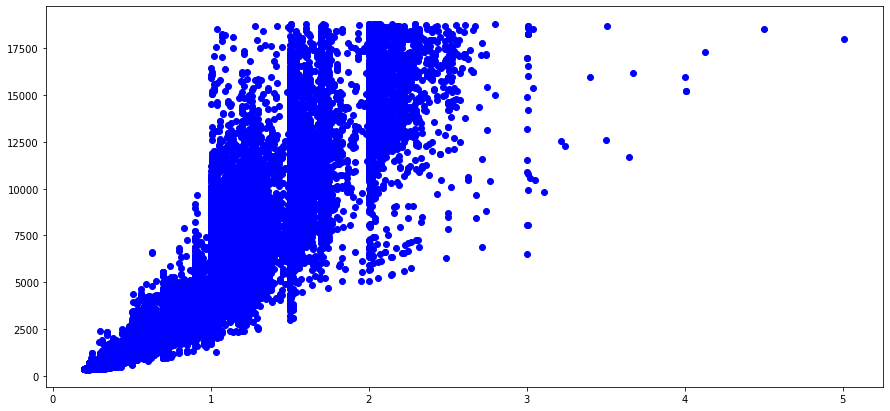

In [27]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of carat versus price.
plt.scatter(diamonds['carat'],
            diamonds['price'],
            color='blue');

<details><summary>How would you describe this plot?</summary>

- As carat increases, price increases. (It looks somewhat linear, but somewhat curved. A line might not be the worst model to the data, but we might want to try fitting a curve to it and see how MSE changes.)
- There seem to be vertical lines in our plot right at 1 carat, 1.5 carats, 2 carats, etc.
- As carat increases, the spread around a "line of best fit" also seems to increase.
- Most of our observations are between like 0.2 carats and 3 carats.
</details>

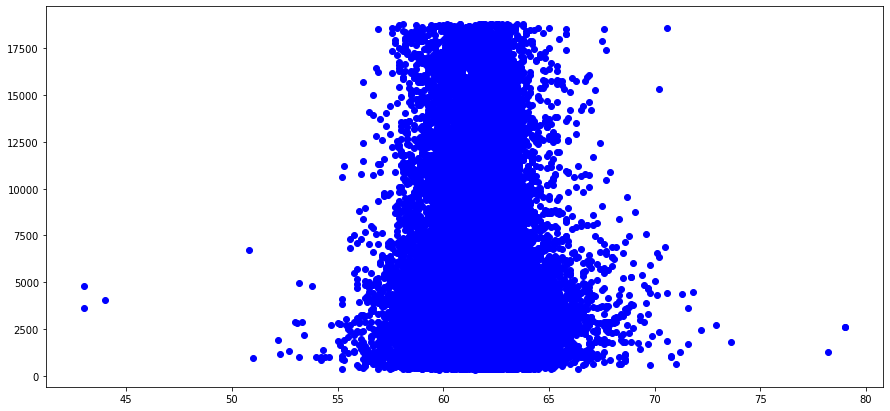

In [28]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of depth versus price.
plt.scatter(diamonds['depth'],
            diamonds['price'],
            color='blue');

<details><summary>How would you describe this plot?</summary>

- As depth increases, it's hard to understand how price changes.
- Almost all of our observations are between 55 and 65 units.
- I'm not sure how good depth will be at predicting price.
</details>

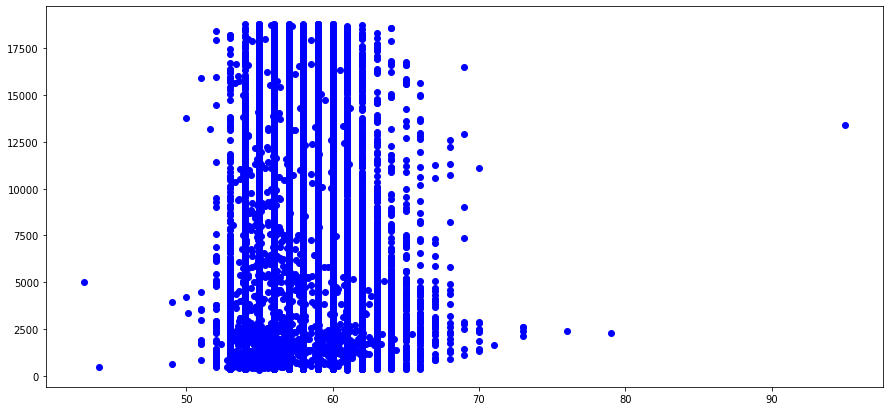

In [29]:
# Create a figure.
plt.figure(figsize=(15,7))

# Generate a scatterplot of table versus price.
plt.scatter(diamonds['table'],
            diamonds['price'],
            color='blue');

<details><summary>How would you describe this plot?</summary>

- There's not a clear relationship between table and price; table doesn't look to be very predictive of price.
- There are clear vertical lines in our data (indicating whole percents).
- Almost all of our observations are between 52 and 70 units.
</details>

**Fit a linear regression model predicting `price` (the target vector) from `carat`, `depth`, and `table`.**

> **Note:** `sklearn` models expect the predictor matrix to be 2D and the target to be 1D.

In [30]:
# Set up our X and y variables.

y = diamonds['price'] # y = what we want to predict
X = diamonds[['carat', 'depth', 'table']] # X = what we use to predict y

# y is usually lower-case because it's only one column
# X is usually upper-case because it's usually multiple columns

In [31]:
# Instantiate our model.
model = LinearRegression()

In [32]:
# Fit our model.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
# Generate predictions.
y_pred = model.predict(X)

In [34]:
# Evaluate our model's performance.
MSE(y, y_pred)

2328790.7951895334

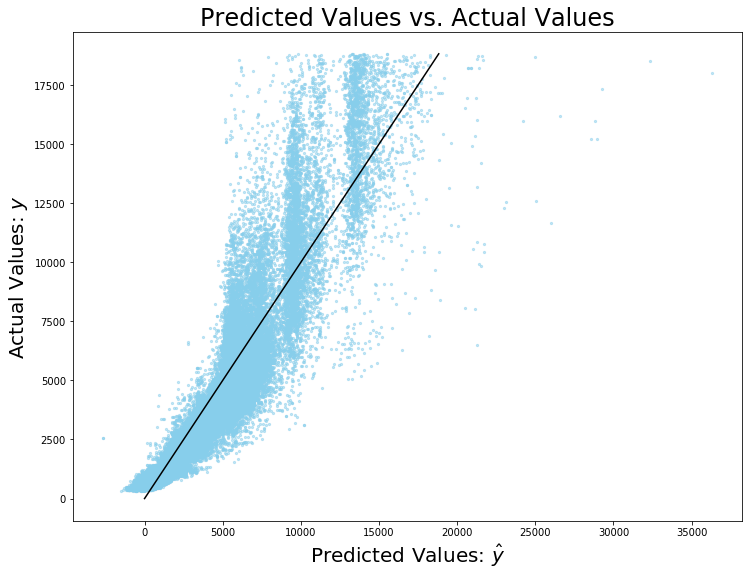

In [35]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(predictions, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

<details><summary>What can this plot tell us about the model?</summary>

- If the points all fell on a diagonal line then we would have a perfect fit. The more "cloud-like" this becomes, the worse our fit will be. We can tell that there are certainly some odd observations where the predictions and the target values are way off.
- As the actual values get higher, our spread of predicted values gets larger - this means there is not equality of variance of our errors!
- There are some predicted values of diamonds that are below 0 - yikes!
</details>

<details><summary>Print out the coefficients from this MLR model. Interpret the coefficient for "carat."</summary>

- As `carat` increases by 1, `price` is expected to increase by \$7,858.77, holding all other variables constant.
</details>

In [36]:
# Print out the model coefficients.

for i in range(len(X.columns)):
    print(X.columns[i], model.coef_[i])

carat 7858.770509935628
depth -151.23634688600592
table -104.47278015889945


## Interview Question

- Pair up with another person in your class.
- Person 1: Ask person 2 to "explain linear regression from a point of view that our CEO could understand." Give them **two minutes**.
- Person 2: Ask person 1 to "explain, under the hood (mathematically), how a linear regression model is created." Give them **two minutes**.
- Debrief.

<details><summary>Explain linear regression from a point of view that our CEO could understand.</summary>
    
- Answers will vary here!
- Best practice: When attempting to explain concepts to a non-technical audience, a specific example or analogy might help.
- "Let's say that I want to predict the cost of a house in Iowa. One really good predictor of how much money a house costs might be the square footage of that house. You can plot this out _(trace this on a table, or use a whiteboard if you have one)_ where you have all of these dots showing the price and square footage for each house in Iowa. Linear regression describes how we take this data and just put a straight line through this data. That straight line is our model! If we were to get a new house on the market whose price we didn't know, we would just look at its square footage, then estimate its price based on that line we drew.
</details>

<details><summary>Explain, under the hood, how a linear regression model is created.</summary>
    
- Answers will vary here!
- Best practice: Start as basic as possible.
- "When fitting a model to our data, it's likely that our model won't be perfect. There will be gaps in between what our model predicts and what we observe to be true. These gaps are errors. A linear regression model is a line that relates our input variables, X, to our output variable, Y. Our goal is to find that line that minimizes these errors. Specifically, we fit the line to our data that minimizes the mean squared error, which is the average squared distance between what we predict and what we observe.
</details>

### Learning Objectives 
- Describe modeling.
- Calculate mean squared error.
- State the assumptions of a linear regression model.
- Be able to interpret the coefficients of a linear regression model.
- Identify the difference between simple and multiple linear regression.
- Fit, generate predictions from, and evaluate a linear regression model in `sklearn`.

## BONUS: Additional resources

Rather than using "least-squares estimation," where we minimize the sum of squared errors, there is a more mathematically complex process called "maximum likelihood estimation." Penn State has a great resource on that if you'd like to learn more: [maximum likelihood estimation.](https://onlinecourses.science.psu.edu/stat504/node/28)
- Maximum likelihood estimation will get identical results for ordinary least squares regression, but it's a more robust procedure that works on many different models!

### Matrix Notation
When we deal with many variables, it's sometimes more convenient to write things out in matrix notation. We won't do this extensively in class, but it's good to recognize it when you see it. A giveaway is when you're dealing with bold letters.

$\mathbf{X}$ is a **matrix** of predictors $\mathbf{x}_1$ through $\mathbf{x}_p$ (with each column a predictor), and $\mathbf{y}$ is the target vector we are seeking to estimate. There is still only 1 *estimated* variable!

### $$ \mathbf{y} = \mathbf{X}\pmb\beta + \pmb\varepsilon$$

Our predictions are given by:

### $$ \hat{\mathbf{y}} = \mathbf{X}\hat{\pmb\beta}$$

**Note:** $\pmb\beta$ and $\hat{\pmb\beta}$ in the formulas above are a *vector* of coefficients, rather than a single value.

Why do we do this? This is convenient in that we don't have to write out $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \varepsilon$ for some large number of variables $p$.

<a id='common-metrics'></a>

## $R^2$

---

You may already be familiar with the [coefficient of determination $R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination):

### $$ R^2 = 1 - \frac{SS_{reg}}{SS_{tot}} $$

Where the regression sum of squares is the sum of squared residuals for our model:

$SS_{reg}=\sum_i (\hat{y} -\bar{y})^2$

And the total sum of squares is the sum of squared residuals for the *baseline* model. This is essentially the variance of our target.

$SS_{tot} = \sum_i (y_i-\bar{y})^2$

$R^2$ is the most common metric to evaluate a regression and is the default scoring measure in sklearn.

**Calculate the $R^2$ of your model by leveraging `sklearn.metrics.r2_score`.**

In [37]:
from sklearn.metrics import r2_score

print(r2_score(y, y_pred))

0.8536762884061408


We interpret this to mean **85.4% of the variability in our data is explained by our model, relative to a model with no predictors.**

<a id='negative-r2'></a>

## A note on negative $R^2$ values

---

Over the course of this class you will encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

We will return to the topic of negative $R^2$ when we talk about training and testing sets and cross-validation.

<a id='patsy'></a>

## A brief introduction to `patsy` formulas (optional)

---

Why slice and dice the data yourself when you just write a formula that defines your model?

The `patsy` package allows you to specify the construction of your model using a formula string, and then returns the matrices required to fit the model.

Let's say we wanted to predict `target` from `x`, `y` and `z`. We would write a string formula like so:

```
formula = 'price ~ x + y + z'
```

Then, after importing patsy, we can generate our target and predictor matrix by supplying the formula and the dataframe that contains the corresponding columns.

```python
import patsy

y, X = patsy.dmatrices(formula, data=diamonds, return_type='dataframe')
```